In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv('./titanic.csv')
df = df.dropna()
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


In [36]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C


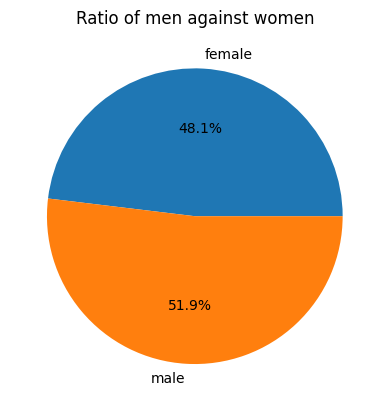

In [37]:
gender = df.groupby('Sex').count()['PassengerId']
plt.title('Ratio of men against women')
plt.pie(gender, labels=list(gender.index.values), autopct='%1.1f%%')
plt.show()

C:\Users\prana\AppData\Local\Temp\ipykernel_12188\2181341946.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


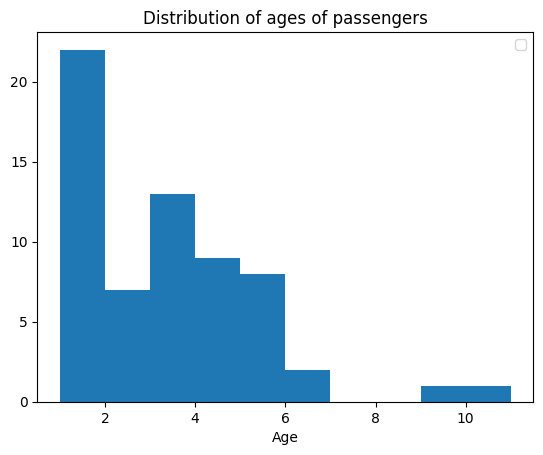

In [39]:
ages = df.groupby('Age').count()['PassengerId']
plt.title('Distribution of ages of passengers')
plt.xlabel('Age')
plt.hist(ages)
plt.legend()
plt.show()

<BarContainer object of 2 artists>

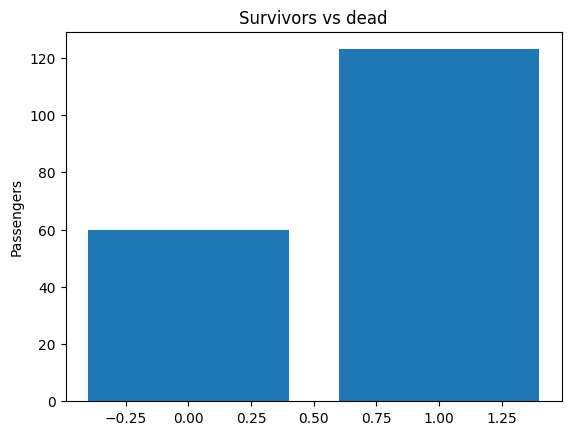

In [53]:
survivors = df.groupby('Survived').count()['PassengerId']
plt.title('Survivors vs dead')
plt.ylabel('Passengers')
plt.bar(survivors.index, height=list(survivors.values))

<Axes: xlabel='Survived'>

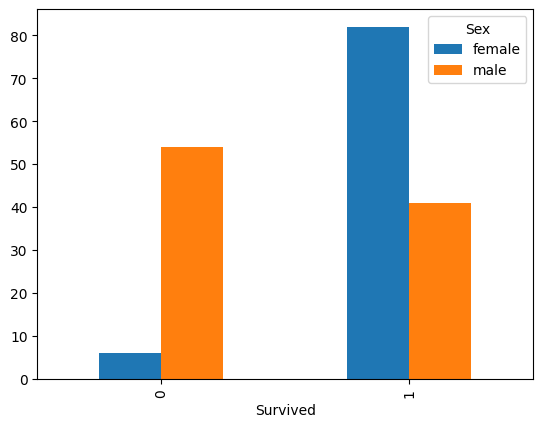

In [52]:
gender_survived = df.groupby(['Survived', 'Sex']).size().unstack()
gender_survived.plot(kind='bar')

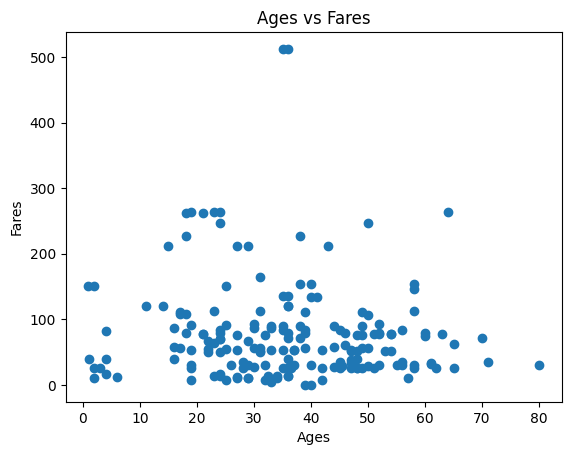

In [54]:
ages = df['Age']
fares = df['Fare']
plt.xlabel('Ages')
plt.ylabel('Fares')
plt.title('Ages vs Fares')
plt.scatter(x=ages, y=fares)

In [64]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
df['Fare'] = minmax.fit_transform(df[['Fare']])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,0.139136,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,0.103644,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,0.101229,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,0.032596,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,0.051822,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,0.102579,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,0.009759,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,0.162314,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,0.058556,B42,S


In [90]:
male_survived = gender_survived.loc[0, 'male']
male_dead = gender_survived.loc[1, 'male']
female_survived = gender_survived.loc[0, 'female']
female_dead = gender_survived.loc[1, 'female']
male_dead

np.int64(41)